# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Importing the dataset

In [3]:
df = pd.read_csv("dataframe_.csv")

In [4]:
df.shape

(1697, 2)

# Exploratory Data Analysis

In [5]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Here the maximum value is way bigger than the mean

## Removing the null values and handling the outliers

In [6]:
df.isnull().sum()

input     1
output    1
dtype: int64

We can see that there are some missing values in **input** and **output** feature. So let's impute these missing values.

In [7]:
df1 = df.fillna(df.median())
df1.isnull().sum()

input     0
output    0
dtype: int64

In [8]:
df1.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check if thers are any outliers using **boxplots**

<AxesSubplot: >

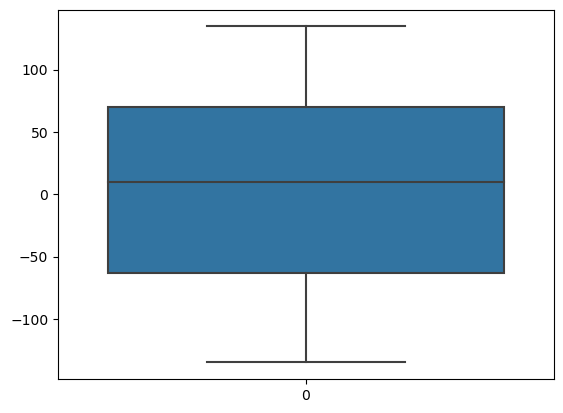

In [9]:
sns.boxplot(df1['input'])

<AxesSubplot: >

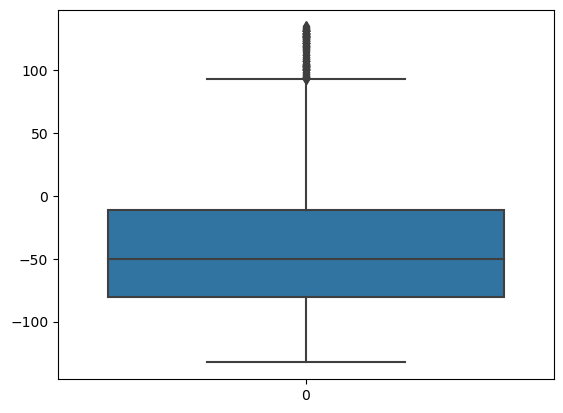

In [10]:
sns.boxplot(df1['output'])

Here we can see that there are outliers. So let us remove them.

In [10]:
df1['output'].quantile(0.999)

133.7931158

In [ ]:
df2 = df1[df1['output'] <= 135]

In [12]:
df1.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check for outliers using boxplots

<AxesSubplot: >

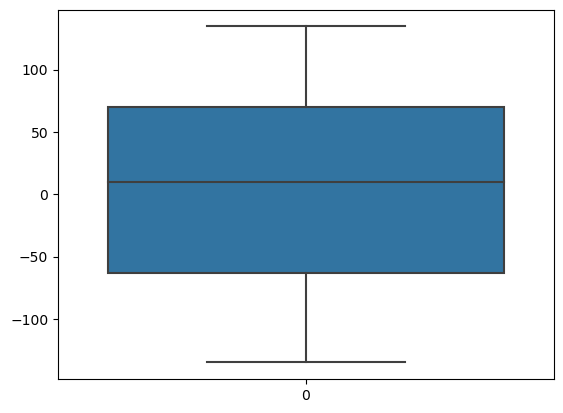

In [14]:
sns.boxplot(df1['input'])

<AxesSubplot: >

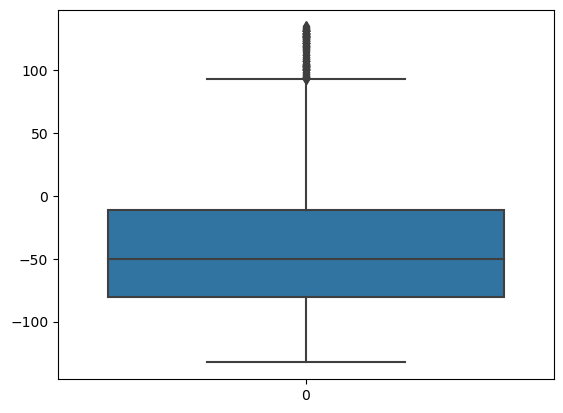

In [16]:
sns.boxplot(df1['output'])

we can see that there are no outliers in the data set

<AxesSubplot: xlabel='input', ylabel='output'>

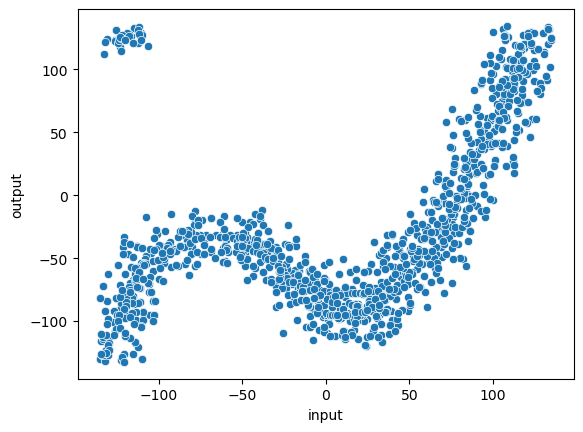

In [18]:
sns.scatterplot(x=df1['input'], y=df1['output'])

# Data preprocessing for Model training and evaluation

In [19]:
x= df1[['input']]
y= df1[['output']]

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=2)

In [27]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(x_test)

In [29]:
lr.score(x_train,y_train)

0.2418595456311441

In [30]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)

3132.6508385640363


In [31]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

43.00598052705851
